In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree

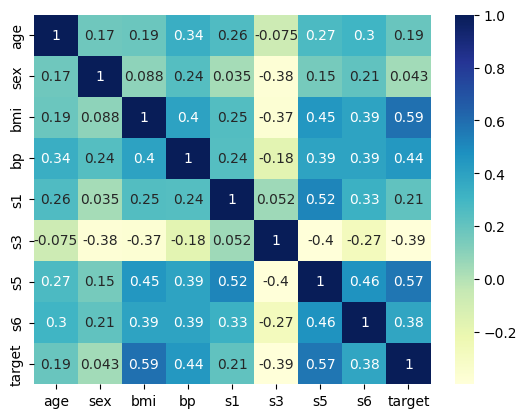

In [3]:
#Linear Regression

dataset = datasets.load_diabetes(as_frame = True)

data = dataset["frame"]

data_drop = data.drop(columns=["s2","s4"]) 

correlation = data_drop.corr()

sns.heatmap(correlation, cmap='YlGnBu', annot=True)
plt.show()


In [4]:
X = data_drop.drop(columns=["target"]).values
y = data_drop["target"].values

X_train = X[:-30]
X_test = X[-30:]

y_train = y[:-30]
y_test = y[-30:]

linreg = LinearRegression()

linreg.fit(X_train,y_train)

y_test_pred = linreg.predict(X_test)

print("Mean Squared Error {}".format(mean_squared_error(y_test, y_test_pred)))


Mean Squared Error 1853.969028977521


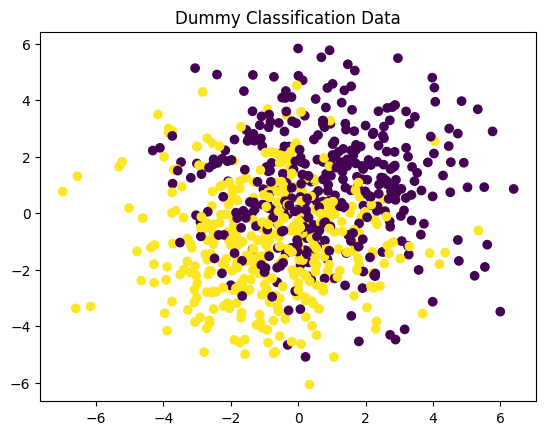

In [5]:
##Logistic Regression

### Generate Blob Data ###
centers = [[1, 1], [-1, -1]]
X_train, y_train = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=2, random_state=0)
X_test, y_test = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=2)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title("Dummy Classification Data")
plt.show()


### Add Dimension to y
y = y.reshape(-1,1)

0.7453333333333333


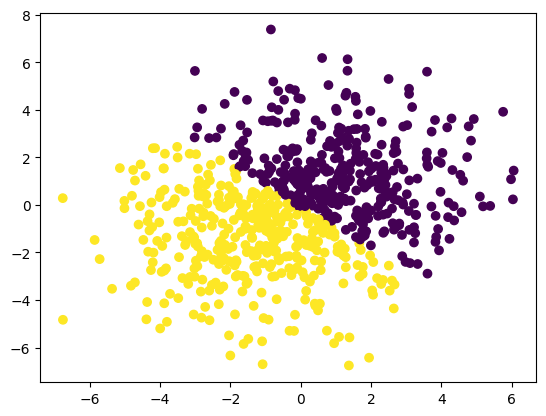

In [6]:
logreg = LogisticRegression(penalty='l2',C=1)      #Regularization

logreg.fit(X_train,y_train)

y_test_pred = logreg.predict(X_test)

print(logreg.score(X_test,y_test))

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred)

In [7]:
#K Nearest Neighbours

dataset = datasets.load_iris(as_frame = True)

iris_data = dataset["frame"]

X = iris_data.drop(columns=["target"]).values
y = iris_data["target"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

norm = Normalizer()
norm.fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)



In [8]:
k = 5
knn = KNeighborsClassifier(k)
knn.fit(X_train_norm, y_train)
y_train_pred = knn.predict(X_train_norm)
y_test_pred = knn.predict(X_test_norm)

print("Training Accuracy of KNN with K = {}:".format(k), accuracy_score(y_train_pred, y_train))
print("Testing Accuracy of KNN with K = {}:".format(k), accuracy_score(y_test_pred, y_test))

Training Accuracy of KNN with K = 5: 0.9809523809523809
Testing Accuracy of KNN with K = 5: 1.0


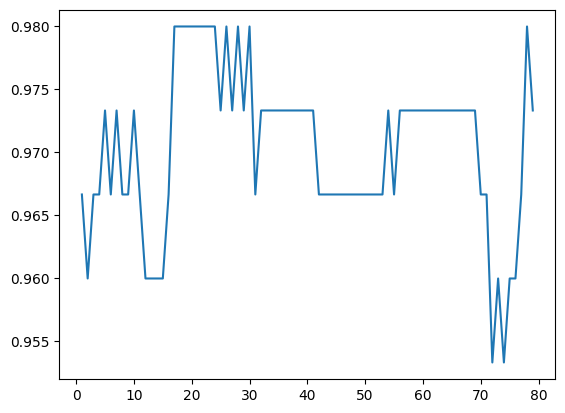

Best K from Cross Validation: 17


In [9]:
X_norm = np.concatenate((X_train_norm,X_test_norm),axis = 0)
y = np.concatenate((y_train,y_test),axis = 0)

ks = list(range(1,80))

cv_acc = []

for k in ks:
  knn = KNeighborsClassifier(k)
  cv = cross_val_score(knn, X_norm, y,cv=5)
  cv_acc.append(np.mean(cv))

plt.plot(ks,cv_acc)
plt.show()

print("Best K from Cross Validation:", ks[np.argmax(cv_acc)])

In [20]:
mnist = datasets.load_digits(as_frame = True)

mnist = mnist["frame"]

X = mnist.drop(columns = ["target"]).values
y = mnist["target"].values

print("Shape of Dataframe:", X.shape)


# plt.figure(figsize=(10,10))
# idx = 42
# image = X.iloc[idx].values.reshape(28,28)
# label = y[idx]

# plt.imshow(image, cmap="gray")
# plt.title(f"Number {label}")
# plt.show()

# Scale our pixel values between 0 and 1
X_scaled = X / 255

X_scaled

Shape of Dataframe: (1797, 64)


array([[0.        , 0.        , 0.01960784, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03921569, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0627451 , 0.03529412,
        0.        ],
       ...,
       [0.        , 0.        , 0.00392157, ..., 0.02352941, 0.        ,
        0.        ],
       [0.        , 0.        , 0.00784314, ..., 0.04705882, 0.        ,
        0.        ],
       [0.        , 0.        , 0.03921569, ..., 0.04705882, 0.00392157,
        0.        ]])

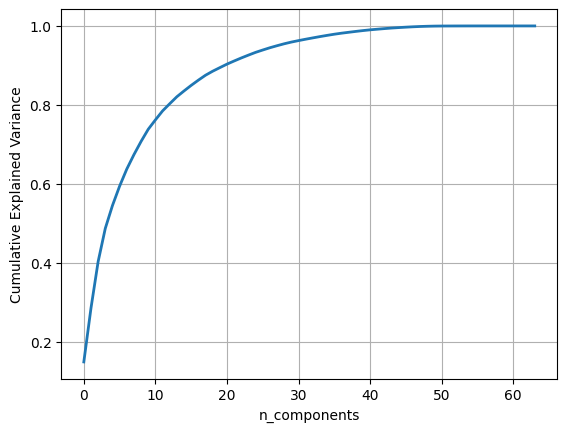

In [25]:
##PCA

# Plot Variance
pca = PCA(n_components=64)
pca_output = pca.fit_transform(X_scaled)

variance_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cumulative_variance_explained = np.cumsum(variance_explained)

cumulative_variance_explained

plt.plot(cumulative_variance_explained, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

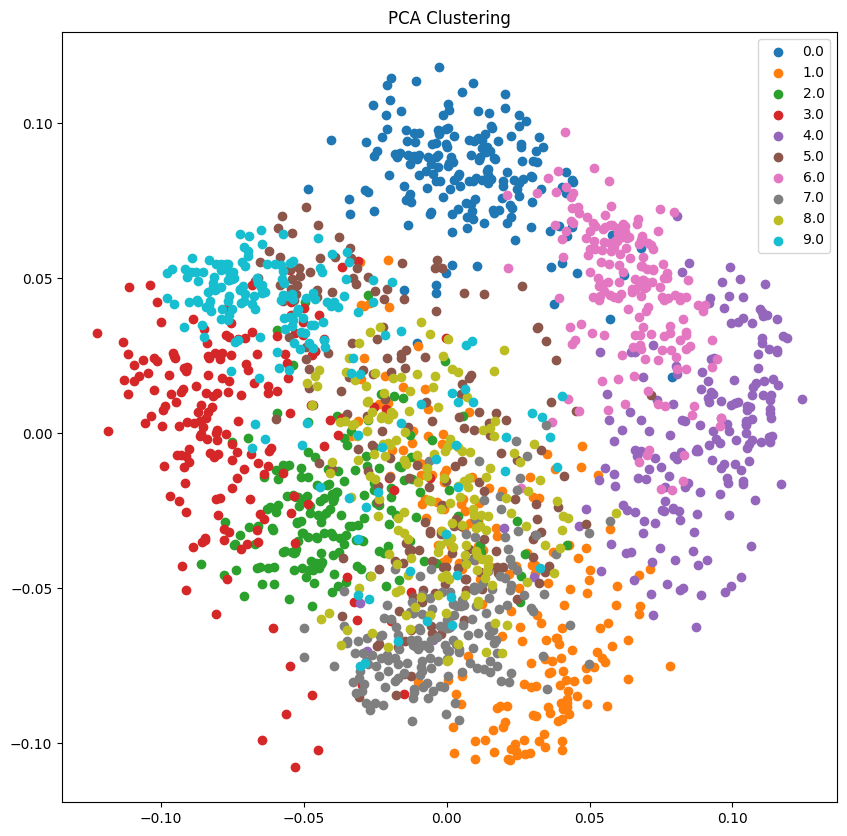

In [26]:
two_components = pca_output[:, :2]

two_components = np.hstack((two_components, y.reshape(-1, 1)))
two_components = pd.DataFrame(data=two_components)
two_components.columns = ["c1", "c2", "target"]

label_groups = two_components.groupby("target")

plt.figure(figsize=(10, 10))
for label, group in label_groups:
    plt.scatter(group["c1"], group["c2"], marker="o", label=label)

plt.legend()
plt.title("PCA Clustering")
plt.show()

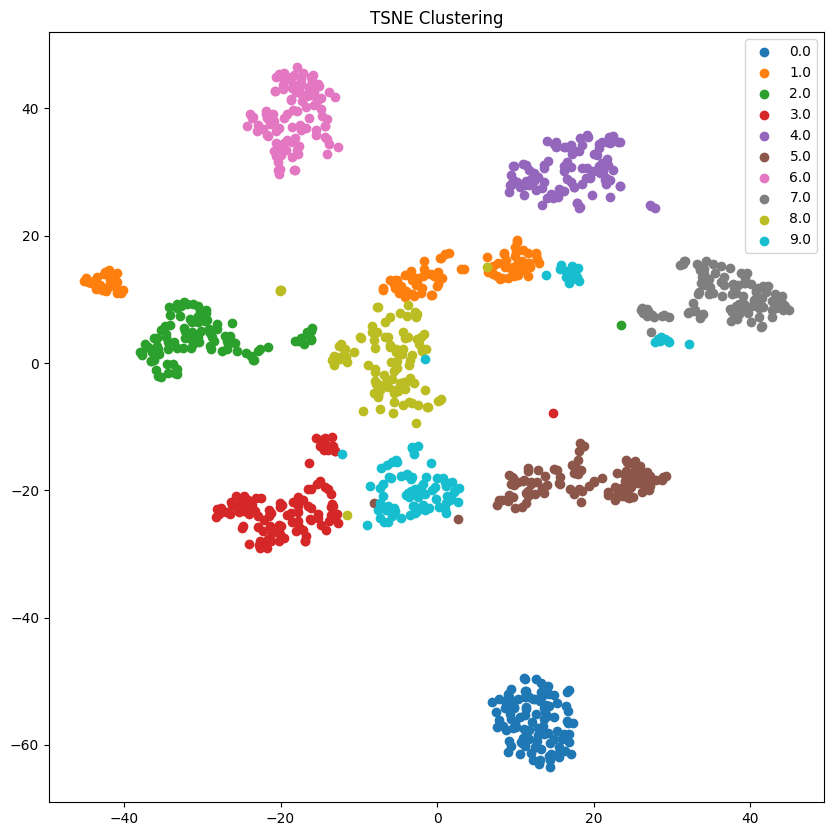

In [27]:
tnse = TSNE(n_components=2, 
            random_state=42,
            learning_rate=200, 
            init="random")

tsne_data = tnse.fit_transform(X_scaled[:1000])
two_components = np.hstack((tsne_data, y[:1000].reshape(-1, 1)))
two_components = pd.DataFrame(data=two_components)
two_components.columns = ["c1", "c2", "target"]

label_groups = two_components.groupby("target")

plt.figure(figsize=(10, 10))
for label, group in label_groups:
  plt.scatter(group["c1"], group["c2"], marker="o", label=label)

plt.legend()
plt.title("TSNE Clustering")
plt.show()

Fitting Data
Predicting Data
Training Accuracy Score: 0.10575139146567718
Testing Accuracy Score: 0.06111111111111111


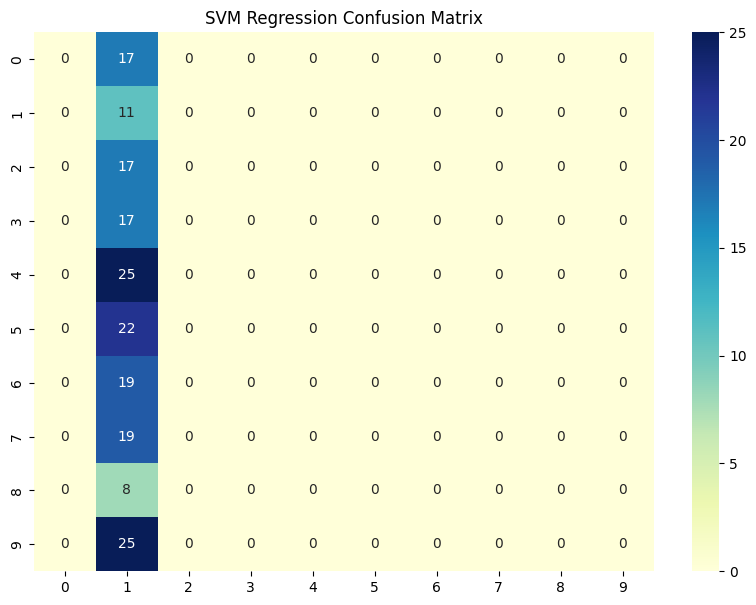

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1,
                                                    shuffle=True,
                                                    random_state=42)
#X_train, X_test = X_train[:, :30], X_test[:, :30]
svc = SVC(C=1,
          gamma=0.001,
          kernel="rbf")

print("Fitting Data")
svc.fit(X_train, y_train)

print("Predicting Data")
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy Score:", accuracy_score(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize = (10,7))
plt.title("SVM Regression Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.show()

Fitting Data
Predicting Data
Training Accuracy Score: 0.10575139146567718
Testing Accuracy Score: 0.06111111111111111


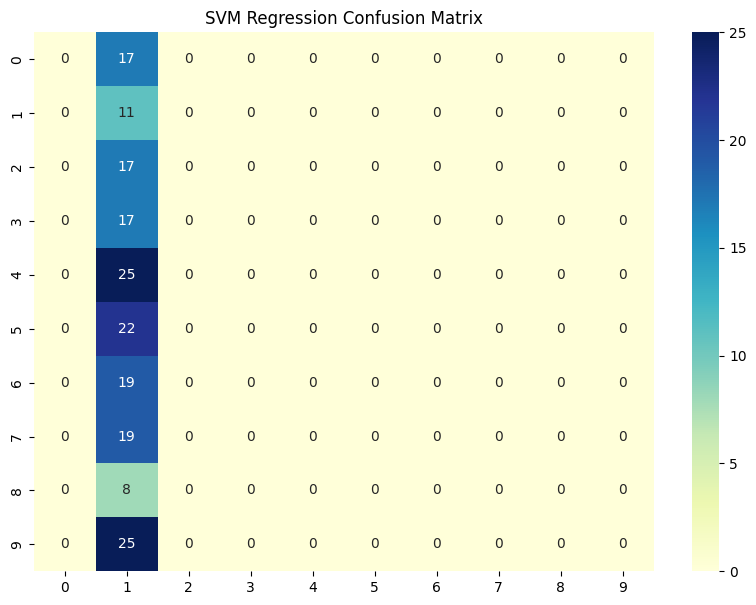

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1,
                                                    shuffle=True,
                                                    random_state=42)
X_train, X_test = X_train[:, :20], X_test[:, :20]
svc = SVC(C=1,
          gamma=0.001,
          kernel="rbf")

print("Fitting Data")
svc.fit(X_train, y_train)

print("Predicting Data")
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy Score:", accuracy_score(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize = (10,7))
plt.title("SVM Regression Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.show()

In [47]:
dataset = datasets.load_iris(as_frame = True)

#print(dataset)

iris_data = dataset["frame"]

X = iris_data.drop(columns=["target"]).values
y = iris_data["target"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train.shape)
print(X_test.shape)

rfc = RandomForestClassifier(n_estimators=100, 
                             max_depth=5)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Testing Accuracy Score:", accuracy_score(y_test, y_pred))

(105, 4)
(45, 4)
Testing Accuracy Score: 1.0


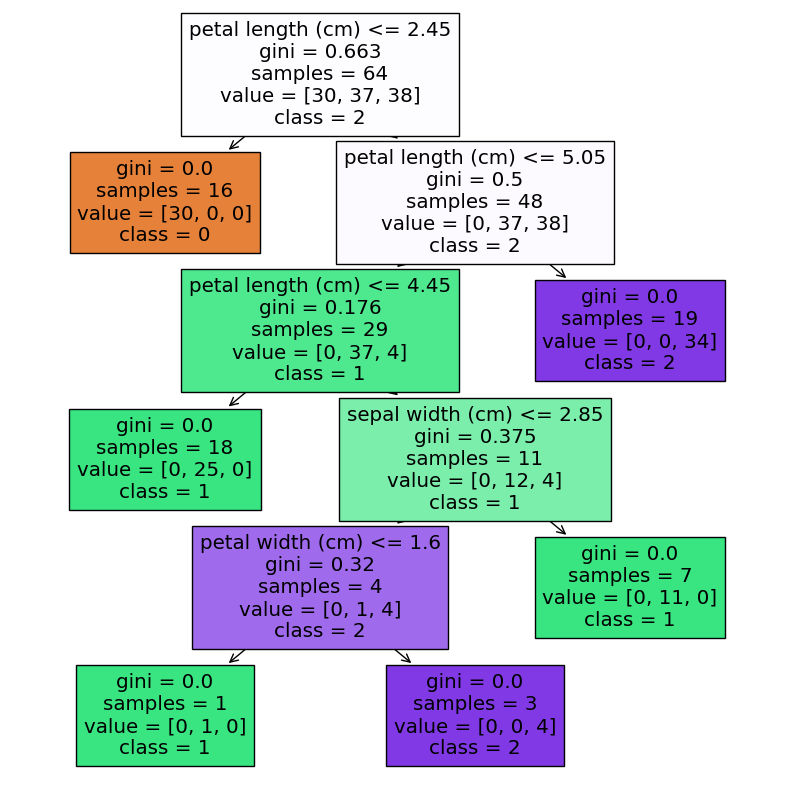

In [48]:
# Lets Plot a Decision Tree
rfc.estimators_ # See how many decision trees we have!

# Lets pick one of them to plot
plt.figure(figsize=(10,10))
_ = tree.plot_tree(rfc.estimators_[0], 
                   feature_names=iris_data.columns[:-1], 
                   filled=True,
                   class_names=["0","1","2"])